<a href="https://colab.research.google.com/github/Hhannzch/show-and-tell-baseline/blob/main/try_with_coco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# try with pycocotools

In [ ]:
!pip install torch==1.6.0 torchvision==0.7.0

     |████████████████████████████████| 748.8 MB 18 kB/s 
     |████████████████████████████████| 5.9 MB 46.4 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu111
    Uninstalling torch-1.9.0+cu111:
      Successfully uninstalled torch-1.9.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu111
    Uninstalling torchvision-0.10.0+cu111:
      Successfully uninstalled torchvision-0.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.6.0 which is incompatible.


In [ ]:
!python

Python 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> 

KeyboardInterrupt
>>> ^C


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pycocotools
from pycocotools.coco import COCO

train_info = '/content/drive/MyDrive/coco/2017/annotations/captions_val2017.json'
train_image = '/content/drive/MyDrive/coco/2017/val2017'

coco = COCO(train_info)
all_ids = coco.imgs.keys()
print(len(all_ids))

loading annotations into memory...
Done (t=1.88s)
creating index...
index created!
5000


[{'image_id': 179765, 'id': 38, 'caption': 'A black Honda motorcycle parked in front of a garage.'}]
190236
[401, 644, 2846, 3464, 4700]
[{'image_id': 190236, 'id': 401, 'caption': 'An office cubicle with four different types of computers.'}]
[{'image_id': 190236, 'id': 644, 'caption': 'The home office space seems to be very cluttered.'}]
[{'image_id': 190236, 'id': 2846, 'caption': 'an office with desk computer and chair and laptop.'}]
[{'image_id': 190236, 'id': 3464, 'caption': 'Office setting with a lot of computer screens.'}]
[{'image_id': 190236, 'id': 4700, 'caption': 'A desk and chair in an office cubicle.'}]
[{'license': 1, 'file_name': '000000190236.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000190236.jpg', 'height': 393, 'width': 640, 'date_captured': '2013-11-15 17:09:36', 'flickr_url': 'http://farm1.staticflickr.com/244/535469198_ee68a4b0c1_z.jpg', 'id': 190236}]


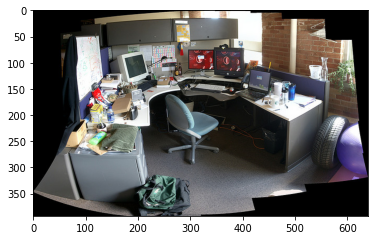

In [43]:
ann_id = list(coco.anns)
print(coco.loadAnns(ann_id[0]))
image_id = coco.loadAnns(ann_id[2])[0]['image_id']
print(image_id)
ann_idlist = coco.getAnnIds(image_id)
print(ann_idlist)
for i in ann_idlist:
  print(coco.loadAnns(i))

import matplotlib.pyplot as plt
img = coco.loadImgs(image_id)
print(img)
path = train_image + '/' + img[0]['file_name']
img_show = plt.imread(path)
plt.imshow(img_show)
plt.show()


In [ ]:
id_list = list(all_ids)
print(id_list[1])
img_path = coco.loadImgs(id_list[1])

37777


In [ ]:
print(img_path[0]['file_name'])

000000037777.jpg


In [ ]:
print(img_path)

import matplotlib.pyplot as plt
img = plt.imread(val_image + '/' + str(img_path[0]['file_name']))
plt.imshow(img)
plt.show()

NameError: ignored

In [ ]:
# plt.imshow(img)
# plt.show()
plt.imshow(img)
plt.axis('off')
ann = coco.getAnnIds(img_path[0]['id'])
# print(ann)
anns = coco.loadAnns(ann)
print(anns)
coco.showAnns(anns)
# mask = coco.annToMask(anns[3])
# plt.imshow(mask); plt.axis('off')


NameError: ignored

# package vocabulary

In [3]:
import nltk

# create a vocabulary class to package voc

class Vocabulary():
  def __init__(self):
    self.word2ind = {}
    self.ind2word = {}
    self.inital_index = 0
  
  def __call__(self, word):
    if not word in self.word2ind:
      return self.word2ind['<unk>']
    else:
      return self.word2ind[word]

  def __len__(self):
    return len(self.word2ind)

  def add_word(self, word):
    if not word in self.word2ind:
      self.word2ind[word] = self.inital_index
      self.ind2word[self.inital_index] = word
      self.inital_index = self.inital_index + 1


In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
from collections import Counter
captions_all = coco.anns.keys()
captions_id = list(captions_all)
count = Counter()
word_list = []
for i, id in enumerate(captions_id):
  caption = coco.loadAnns(id)[0]['caption']
  # print(caption)
  tokens = nltk.tokenize.word_tokenize(caption.lower())
  # print(tokens)
  count.update(tokens)
  if i%10000 == 0:
    print("finish " + str(i) +" tokenized")
  # break

for word, cnt in count.items():
  if cnt >= 50:
    word_list.append(word)

finish 0 tokenized
finish 10000 tokenized
finish 20000 tokenized


In [6]:
voc = Vocabulary()
voc.add_word("<pad>")
voc.add_word("<unk>")
voc.add_word("<sta>")
voc.add_word("<end>")

for word in word_list:
  voc.add_word(word)

print(len(voc))

554


# preprocessing pictures ====> no need

In [ ]:
# from PIL import Image
# im = Image.open(path)
# plt.imshow(im)
# plt.show()
# im_resize = im.resize((1000,1500),Image.ANTIALIAS)
# plt.imshow(im_resize)
# plt.show()

In [ ]:
img_ids = list(coco.imgs.keys())
print(coco.loadImgs(img_ids[1])[0])

{'license': 4, 'file_name': '000000522418.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000522418.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-14 11:38:44', 'flickr_url': 'http://farm1.staticflickr.com/1/127244861_ab0c0381e7_z.jpg', 'id': 522418}


In [ ]:
# from PIL import Image
# import os
# img_ids = list(coco.imgs.keys())
# print(img_ids[1])
# for (cnt, ids) in enumerate(img_ids):
#   img_id = coco.loadImgs(ids)
#   pic_dic = train_image + '/' + img_id[0]['file_name']
#   im = Image.open(pic_dic)
#   im_resize = im.resize((512,512), Image.ANTIALIAS)
#   im_resize.save('/content/drive/MyDrive/coco/train_resize2017/' + img_id[0]['file_name'])
#   if cnt%5000 == 0:
#     print("finish resizing "+ str(cnt) + " pictures")







# package dataset

In [ ]:
from PIL import Image
img_ids = list(coco.imgs.keys())
for i in range(10):
  img = coco.loadImgs(img_ids[i])
  print(img)

[{'license': 3, 'file_name': '000000391895.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg', 'height': 360, 'width': 640, 'date_captured': '2013-11-14 11:18:45', 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg', 'id': 391895}]
[{'license': 4, 'file_name': '000000522418.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000522418.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-14 11:38:44', 'flickr_url': 'http://farm1.staticflickr.com/1/127244861_ab0c0381e7_z.jpg', 'id': 522418}]
[{'license': 3, 'file_name': '000000184613.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000184613.jpg', 'height': 336, 'width': 500, 'date_captured': '2013-11-14 12:36:29', 'flickr_url': 'http://farm3.staticflickr.com/2169/2118578392_1193aa04a0_z.jpg', 'id': 184613}]
[{'license': 3, 'file_name': '000000318219.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000318219.jpg', 'height': 640, 'width': 556,

In [55]:
a = list(coco.anns.keys())
print(coco.loadAnns(a[0]))
print(coco.loadImgs(coco.loadAnns(a[0])[0]['image_id']))

[{'image_id': 179765, 'id': 38, 'caption': 'A black Honda motorcycle parked in front of a garage.'}]
[{'license': 3, 'file_name': '000000179765.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000179765.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-15 14:02:51', 'flickr_url': 'http://farm3.staticflickr.com/2824/10213933686_6936eb402b_z.jpg', 'id': 179765}]


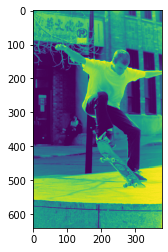

(640, 378)
(640, 378, 3)
(480, 640, 3)


In [97]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
test = Image.open(train_image + '/' + '000000431848.jpg')
test1 = Image.open(train_image + '/' + '000000179765.jpg')

sh = plt.imread(train_image + '/' + '000000431848.jpg')
plt.imshow(sh)
plt.show()

ar = np.asarray(test)
x = np.ones((ar.shape[0], ar.shape[1], 3))
x[:,:,0] = ar
x[:,:,1] = ar
x[:,:,2] = ar

print(ar.shape)
print(x.shape)
print(np.asarray(test1).shape)

In [105]:
# package my dataset
import torch
from PIL import Image
import numpy as np

class cocoData(torch.utils.data.Dataset):
  def __init__(self, transform = None):
    self.ids = list(coco.anns.keys())
    self.transform = transform

  def __getitem__(self, ind):
    id = self.ids[ind]
    image_id = coco.loadAnns(id)[0]['image_id']
    caption_pre = str(coco.loadAnns(id)[0]['caption'])
    image_info = coco.loadImgs(image_id)
    image_path = image_info[0]['file_name']

    im = Image.open(train_image + '/' + image_path)

    # im = np.asarray(im)
    image_dim_len = len(np.array(im).shape)
    if image_dim_len == 2:
      # len(imgs_data.shape) == 2
      ar = np.asarray(im, dtype=np.uint8)
      x = np.ones((ar.shape[0], ar.shape[1], 3))
      x[:,:,0] = ar
      x[:,:,1] = ar
      x[:,:,2] = ar
      im = Image.fromarray(x, mode='RGB')


      # ar = np.asarray(test)
      # x = np.ones((ar.shape[0], ar.shape[1], 3))
      # x[:,:,0] = ar
      # x[:,:,1] = ar
      # x[:,:,2] = ar
    
    # if im.shape[2] == 1:
    #   im = np.repeat(im[:,:,np.newaxis], 3, axis=2)
    #   im = self.transform(Image.fromarray(im))

    # imgs_data = self.transform(imgs_data[:, np.newaxis]).reshape(1, 4096)
    if self.transform is not None:
      im = self.transform(im)

    tokens = nltk.tokenize.word_tokenize(caption_pre.lower())
    caption = []
    caption.append(voc('<start>'))
    # timer = 0
    # for i in tokens:
    #   timer += 1
    #   if timer<=20:
    #     caption.append(voc(i))
    #   else:
    #     break
    
    # caption.append(voc('<end>'))
    # while timer<=20:
    #   caption.append(voc('<pad>'))
    #   timer += 1

    for i in tokens:
      caption.append(voc(i))
    caption.append(voc('<end>'))

    caption_final = torch.Tensor(caption)
    return im, caption_final

  def __len__(self):
    return len(self.ids)

In [99]:
def collate_fn(data):
    """Creates mini-batch tensors from the list of tuples (image, caption).
    
    We should build custom collate_fn rather than using default collate_fn, 
    because merging caption (including padding) is not supported in default.
    Args:
        data: list of tuple (image, caption). 
            - image: torch tensor of shape (3, 256, 256).
            - caption: torch tensor of shape (?); variable length.
    Returns:
        images: torch tensor of shape (batch_size, 3, 256, 256).
        targets: torch tensor of shape (batch_size, padded_length).
        lengths: list; valid length for each padded caption.
    """
    # Sort a data list by caption length (descending order).
    data.sort(key=lambda x: len(x[1]), reverse=True)
    images, captions = zip(*data)

    # Merge images (from tuple of 3D tensor to 4D tensor).
    images = torch.stack(images, 0)

    # Merge captions (from tuple of 1D tensor to 2D tensor).
    lengths = [len(cap) for cap in captions]
    targets = torch.zeros(len(captions), max(lengths)).long()
    for i, cap in enumerate(captions):
        end = lengths[i]
        targets[i, :end] = cap[:end]        
    return images, targets, lengths

In [106]:
from torchvision import transforms, utils
import torch.utils.data as data
dataset = cocoData(transform=transforms.Compose([transforms.Resize((256,256)), transforms.ToTensor()]))
train_data = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=True, num_workers=2, collate_fn=collate_fn)

In [10]:
print(len(dataset))

25014


In [107]:
# print(dataset[0][0].size()) # the input of image data is 3 dimensions RGB image with 512*512 pixels

for i, (a,b,c) in enumerate(train_data):
  print(str(i)+ str(a.shape))

0torch.Size([128, 3, 256, 256])
1torch.Size([128, 3, 256, 256])
2torch.Size([128, 3, 256, 256])
3torch.Size([128, 3, 256, 256])
4torch.Size([128, 3, 256, 256])
5torch.Size([128, 3, 256, 256])
6torch.Size([128, 3, 256, 256])
7torch.Size([128, 3, 256, 256])
8torch.Size([128, 3, 256, 256])
9torch.Size([128, 3, 256, 256])
10torch.Size([128, 3, 256, 256])
11torch.Size([128, 3, 256, 256])
12torch.Size([128, 3, 256, 256])
13torch.Size([128, 3, 256, 256])
14torch.Size([128, 3, 256, 256])
15torch.Size([128, 3, 256, 256])
16torch.Size([128, 3, 256, 256])
17torch.Size([128, 3, 256, 256])
18torch.Size([128, 3, 256, 256])
19torch.Size([128, 3, 256, 256])
20torch.Size([128, 3, 256, 256])
21torch.Size([128, 3, 256, 256])
22torch.Size([128, 3, 256, 256])
23torch.Size([128, 3, 256, 256])
24torch.Size([128, 3, 256, 256])
25torch.Size([128, 3, 256, 256])
26torch.Size([128, 3, 256, 256])
27torch.Size([128, 3, 256, 256])
28torch.Size([128, 3, 256, 256])
29torch.Size([128, 3, 256, 256])
30torch.Size([128, 3

OSError: ignored

In [117]:
print(len(train_data))

6254


# CNN + LSTM model

In [108]:
# construct 
import torch.nn as nn
import torchvision.models as models
from torch.nn.utils.rnn import pack_padded_sequence

device = 'cuda' if torch.cuda.is_available() else 'cpu'

class Encoder(nn.Module):
  def __init__(self, embed_size=256):
    super(Encoder, self).__init__()
    resnet = models.resnet152(pretrained=True)
    modules = list(resnet.children())[:-1]
    self.resnet = nn.Sequential(*modules)
    print(resnet.fc.in_features)
    self.linear = nn.Linear(resnet.fc.in_features, embed_size)
    self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)

  def forward(self, images):
    with torch.no_grad():
      features = self.resnet(images)
    features = features.reshape(features.size(0), -1)
    features = self.bn(self.linear(features))
    # features = self.linear(features)
    # print(features)
    return features

class Decoder(nn.Module): 
  def __init__(self, embed_size=256, hidden_size=512, voc_size=len(voc), num_layers=1, max_length=20):
    super(Decoder,self).__init__()
    self.embed = nn.Embedding(voc_size, embed_size)
    self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=2, batch_first=True)
    self.linear = nn.Linear(hidden_size, voc_size)
    self.max_length = max_length

  def forward(self, features, captions, lengths):
    embeddings = self.embed(captions)
    embeddings = torch.cat((features.unsqueeze(1), embeddings), 1)
    packed = pack_padded_sequence(embeddings, lengths, batch_first=True) 
    hiddens, _ = self.lstm(packed)
    outputs = self.linear(hiddens[0])
    # print(outputs.shape)
    return outputs

  def sample(self, features, states=None):
    """Generate captions for given image features using greedy search."""
    sampled_ids = []
    inputs = features.unsqueeze(1)
    for i in range(self.max_seg_length):
        hiddens, states = self.lstm(inputs, states)          # hiddens: (batch_size, 1, hidden_size)
        outputs = self.linear(hiddens.squeeze(1))            # outputs:  (batch_size, vocab_size)
        _, predicted = outputs.max(1)                        # predicted: (batch_size)
        sampled_ids.append(predicted)
        inputs = self.embed(predicted)                       # inputs: (batch_size, embed_size)
        inputs = inputs.unsqueeze(1)                         # inputs: (batch_size, 1, embed_size)
    sampled_ids = torch.stack(sampled_ids, 1)                # sampled_ids: (batch_size, max_seq_length)
    return sampled_ids




In [109]:
encoder = Encoder().to(device)

Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

2048


In [110]:
decoder = Decoder().to(device)

In [111]:
criterion = nn.CrossEntropyLoss()
params = list(decoder.parameters()) + list(encoder.linear.parameters()) + list(encoder.bn.parameters())
optimizer = torch.optim.Adam(params, lr=0.001)

In [113]:
total_step = len(train_data)
for epoch in range(5):
  for i, (images, captions, length) in enumerate(train_data):
    images = images.to(device)
    captions = captions.to(device)
    targets = pack_padded_sequence(captions, length, batch_first=True)[0]

    features = encoder(images)
    # features = torch.tensor(features).to(device).long()
    outputs = decoder(features, captions, length)
    # print(outputs.shape)
    # print(targets.shape)
    loss = criterion(outputs, targets)

    encoder.zero_grad()
    decoder.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss = 0
    running_loss += loss.item()
    """ print training loss per 500 batch"""
    if i % 5 == 0: 
      print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 5))
      running_loss = 0.0

[1,     1] loss: 0.878
[1,     6] loss: 0.858
[1,    11] loss: 0.820
[1,    16] loss: 0.787
[1,    21] loss: 0.773
[1,    26] loss: 0.750
[1,    31] loss: 0.730
[1,    36] loss: 0.708
[1,    41] loss: 0.681
[1,    46] loss: 0.657
[1,    51] loss: 0.670
[1,    56] loss: 0.652
[1,    61] loss: 0.647
[1,    66] loss: 0.646
[1,    71] loss: 0.650
[1,    76] loss: 0.616
[1,    81] loss: 0.617
[1,    86] loss: 0.613
[1,    91] loss: 0.598
[1,    96] loss: 0.613
[1,   101] loss: 0.600
[1,   106] loss: 0.589
[1,   111] loss: 0.592
[1,   116] loss: 0.589
[1,   121] loss: 0.585
[1,   126] loss: 0.577
[1,   131] loss: 0.572
[1,   136] loss: 0.566
[1,   141] loss: 0.562
[1,   146] loss: 0.569
[1,   151] loss: 0.579
[1,   156] loss: 0.556
[1,   161] loss: 0.563
[1,   166] loss: 0.553
[1,   171] loss: 0.557
[1,   176] loss: 0.552
[1,   181] loss: 0.557
[1,   186] loss: 0.557
[1,   191] loss: 0.551
[1,   196] loss: 0.552
[2,     1] loss: 0.540
[2,     6] loss: 0.529
[2,    11] loss: 0.509
[2,    16] 